In [ ]:
%pip install conll-df

In [220]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '../data/ler/ler.conll'

In [285]:
#no nan values
df = pd.read_csv(path, sep=' ', header=None, names=['token','tag'], quoting=csv.QUOTE_NONE)

# new index start at 1 not 0
df.index = np.arange(1,len(df)+1) 

# with nan values
#df = pd.read_csv(path, sep=' ', header=None, names=['token','tag'], quoting=csv.QUOTE_NONE,skip_blank_lines=False) 

# nan values and #lines
#df = pd.read_csv(path, sep=' ', header=None, names=['token','tag'], quoting=csv.QUOTE_NONE,skip_blank_lines=False,nrows=100000) 

# For better plotting combine I-tags and B-tags
df['tag'] = df['tag'].str.replace("I-","")
df['tag'] = df['tag'].str.replace("B-","")

In [286]:
df.head(50)

,token,tag
1,Prozesskostenhilfe,O
2,-,O
3,Entschädigung,O
4,für,O
5,überlange,O
6,Verfahrensdauer,O
7,-,O
8,Revisionsverfahren,O
9,Der,O
10,Antrag,O


In [287]:
# Kleine Hilfe zum gegenchecken ob token (mit index x) in selbe Zeile x im Datensatz steht.
# stimmt nur, wenn NaN values (oder etwas anderes) für leere zeilen aus datensatz eingelesen wurden
df.iloc[lambda x: x.index == 71973] 

,token,tag
71973,Geriatrie,O


In [288]:
tags = df.groupby(['tag']).count().sort_values(["token"],ascending=False)
#tags = tags.loc[(tags['token']) > 500] # tags mit geringen vorkommen entfernen
tags = tags.loc[(tags['token'] < 200000)] # tag 0 entfernt #O = 1743959
fulltags = ['Rechtsprechungen','Gesetze','Rechtsliteratur','Verträge','Europäische Normen','Institutionen','Gerichte','Verordnungen','Vorschriften','Organisationen','Unternehmen','Personen','Länder','Richter','Städte','Marken','Straßen','Landschaftsbezeichnungen','Anwälte']
tags['fulltags'] = fulltags
tags

,token,fulltags
tag,,
RS,194601,Rechtsprechungen
GS,116934,Gesetze
LIT,38119,Rechtsliteratur
VT,15227,Verträge
EUN,12520,Europäische Normen
INN,6872,Institutionen
GRT,5981,Gerichte
VO,5238,Verordnungen
VS,4702,Vorschriften


In [289]:
tokenSum = tags['token'].sum()
"{}{}".format("Anzahl Tokens: ", tokenSum)

'Anzahl Tokens: 413082'

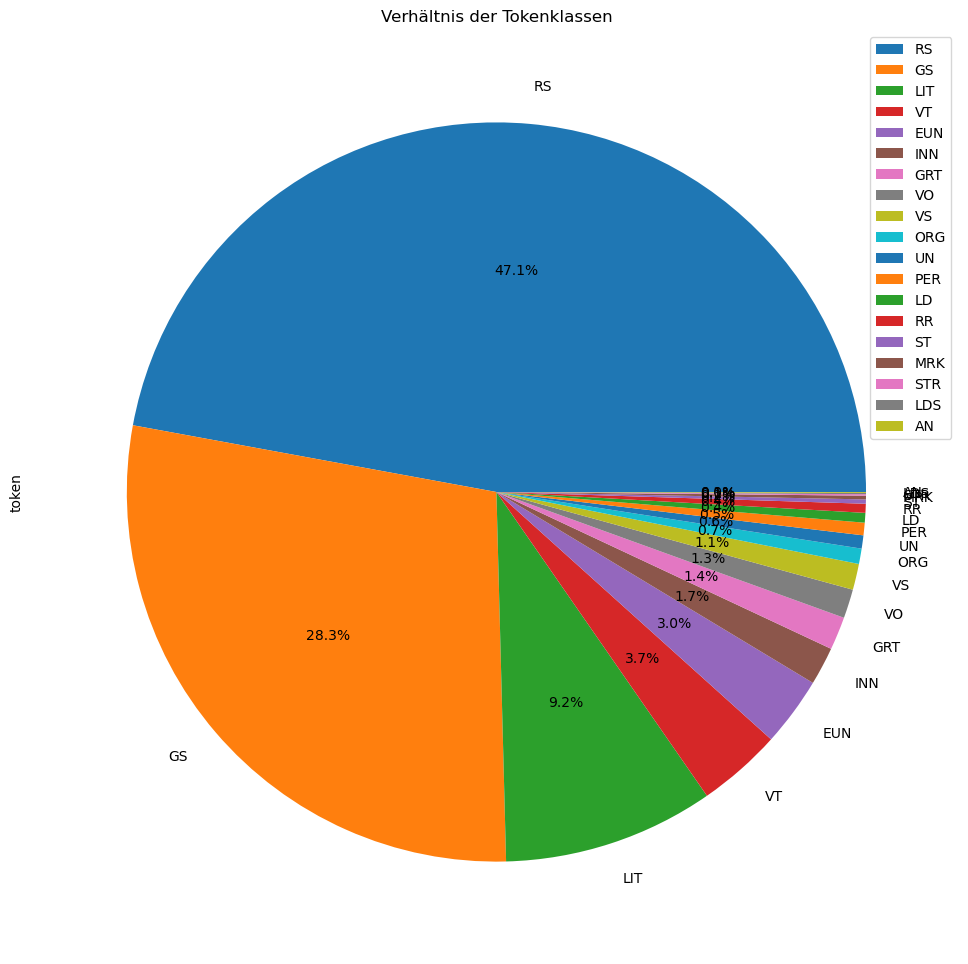

In [290]:
plot = tags.plot.pie(y='token', title='Verhältnis der Tokenklassen', autopct='%1.1f%%', figsize=(16,12))

# Entferne nun die zwei größten Tokenklassen für bessere Übersicht

In [293]:
#tags = tags.loc[(tags['token'] < 190000)] # tag RS entfernt #RS = 194601
tags = tags.loc[(tags['token'] < 98413)] # tag GS entfernt #GS = 116934
fulltags = ['Rechtsliteratur','Verträge','Europäische Normen','Institutionen','Gerichte','Verordnungen','Vorschriften','Organisationen','Unternehmen','Personen','Länder','Richter','Städte','Marken','Straßen','Landschaftsbezeichnungen','Anwälte']
tags['fulltags'] = fulltags
tags

,token,fulltags
tag,,
LIT,38119,Rechtsliteratur
VT,15227,Verträge
EUN,12520,Europäische Normen
INN,6872,Institutionen
GRT,5981,Gerichte
VO,5238,Verordnungen
VS,4702,Vorschriften
ORG,2771,Organisationen
UN,2384,Unternehmen


In [294]:
tokenSum = tags['token'].sum()
"{}{}".format("Anzahl Tokens: ", tokenSum)

'Anzahl Tokens: 101547'

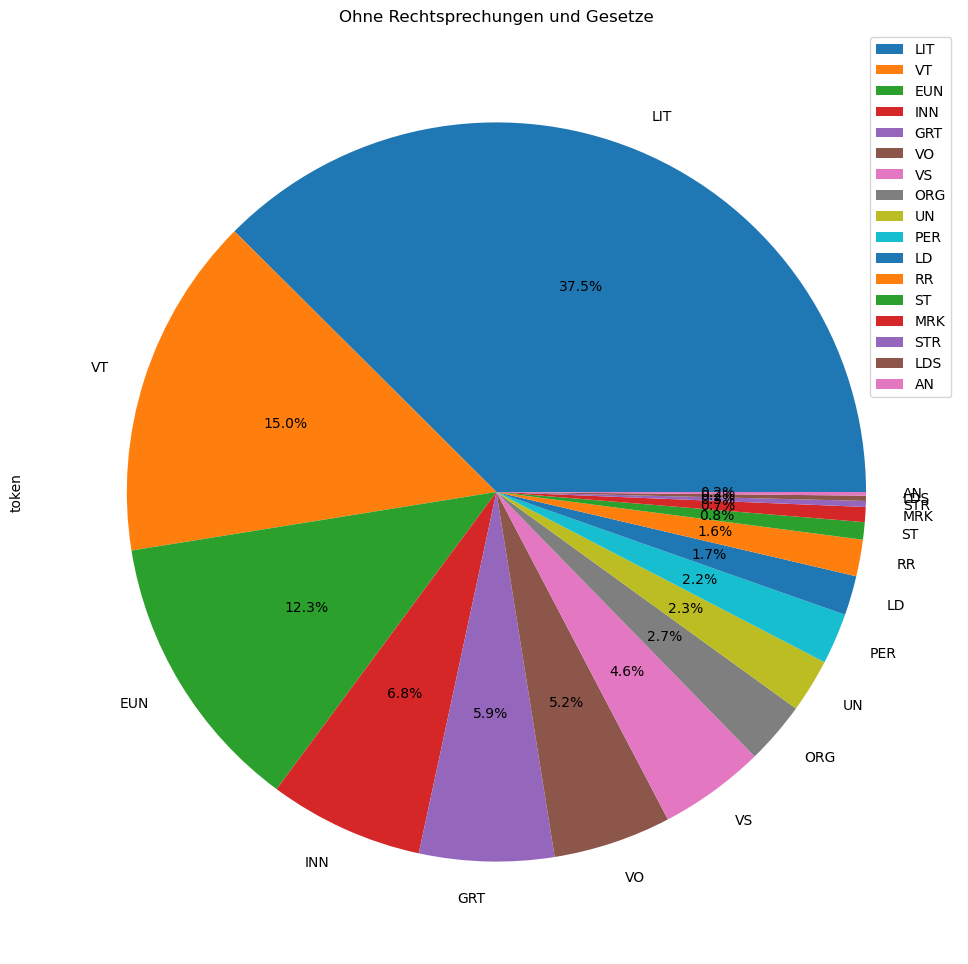

In [295]:
plot = tags.plot.pie(y='token', title='Ohne Rechtsprechungen und Gesetze', autopct='%1.1f%%', figsize=(16,12))